**MODIFIKASI DAN VISUALISASI KOMPONEN PENYUSUN QUALITY OF LIFE**

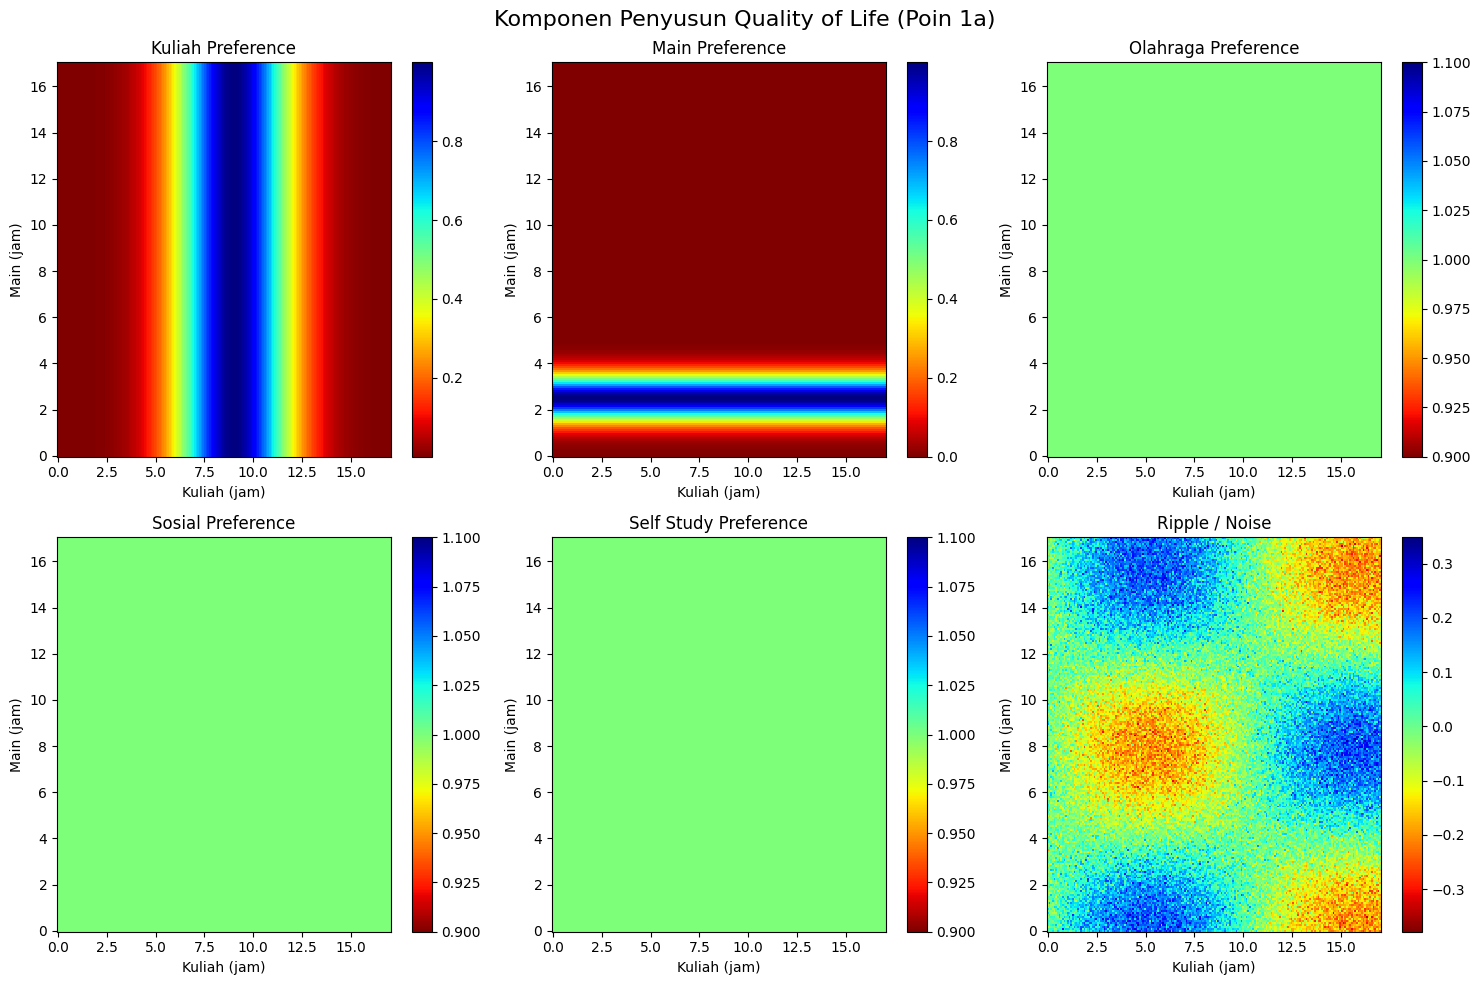

In [54]:
#Nama : Desi Nofitasari
#NPM  : 24083010058
#Kelas: Analisis Numerik A
import numpy as np
import matplotlib.pyplot as plt

#PARAMETER DASAR
istirahat = 7
res = 200
xmin, xmax, ymin, ymax = 0, 24-istirahat, 0, 24-istirahat
x = np.linspace(xmin, xmax, res)   # kuliah
y = np.linspace(ymin, ymax, res)   # main
X, Y = np.meshgrid(x, y)

# PREFERENSI UTAMA
kuliah_pref = np.exp(-((X - 9.0)**2) / (3.0**2))
main_pref   = np.exp(-((Y - 2.5)**2) / (1.0**2))

#FAKTOR TAMBAHAN
sport_time = 0.5   # olahraga ( 30 menit ideal)
sport_pref = np.exp(-((sport_time - 0.5)**2) / (0.3**2)) * np.ones_like(X)

social_time = 2.0  # sosial (2 jam ideal)
social_pref = np.exp(-((social_time - 2.0)**2) / (0.8**2)) * np.ones_like(X)

selfstudy_time = 2.5 # belajar mandiri (2,5 jam ideal)
selfstudy_pref = np.exp(-((selfstudy_time - 2.5)**2) / (0.8**2)) * np.ones_like(X)

# PENALTI
total_waktu = X + Y + sport_time + social_time + selfstudy_time + istirahat
total_penalty = 0.3 * np.exp(np.maximum(total_waktu-24, 0)/3.0)

kebanyakan_main = 1 / (1 + np.exp(-(Y-5)))
kebanyakan_lembur = 1 / (1 + np.exp(-(X-10)))

# MOTIVASI HARIAN (RIPPLE + NOISE)
np.random.seed(42)
ripple = 0.2 * np.sin(0.3*X) * np.cos(0.4*Y)
ripple += np.random.normal(0, 0.05, size=X.shape)

# PLOT KOMPONEN SECARA BERDAMPINGAN
fig, axes = plt.subplots(2, 3, figsize=(15,10))

cmaps = "jet_r"

# Komponen preferensi
im1 = axes[0,0].pcolormesh(X, Y, kuliah_pref, cmap=cmaps, shading="auto")
axes[0,0].set_title("Kuliah Preference")
plt.colorbar(im1, ax=axes[0,0])

im2 = axes[0,1].pcolormesh(X, Y, main_pref, cmap=cmaps, shading="auto")
axes[0,1].set_title("Main Preference")
plt.colorbar(im2, ax=axes[0,1])

im3 = axes[0,2].pcolormesh(X, Y, sport_pref, cmap=cmaps, shading="auto")
axes[0,2].set_title("Olahraga Preference")
plt.colorbar(im3, ax=axes[0,2])

# Komponen lain
im4 = axes[1,0].pcolormesh(X, Y, social_pref, cmap=cmaps, shading="auto")
axes[1,0].set_title("Sosial Preference")
plt.colorbar(im4, ax=axes[1,0])

im5 = axes[1,1].pcolormesh(X, Y, selfstudy_pref, cmap=cmaps, shading="auto")
axes[1,1].set_title("Self Study Preference")
plt.colorbar(im5, ax=axes[1,1])

im6 = axes[1,2].pcolormesh(X, Y, ripple, cmap=cmaps, shading="auto")
axes[1,2].set_title("Ripple / Noise")
plt.colorbar(im6, ax=axes[1,2])

for ax in axes.flat:
    ax.set_xlabel("Kuliah (jam)")
    ax.set_ylabel("Main (jam)")

plt.suptitle("Komponen Penyusun Quality of Life (Poin 1a)", fontsize=16)
plt.tight_layout()
plt.show()

Gambar-gambar diatas adalah preferensi dari komponen penyusun dari quality of life,berikut penjelasannya:

1. Kuliah Preference dan main Preference → Dimodelkan dengan fungsi eksponen berbentuk lonceng dimana penggali (x−μ)^2 menentukan jarak dari waktu ideal kuliah yaitu 9 jam dan main yaitu 2.5 jam sedangkan σ^2 mengatur toleransi terhadap penyimpangan dari titik ideal.Pada gambar preference kuliah sebagai sumbu X ,terlihat warna biru gelap menyatakan waktu paling ideal dan semakin geser ke kanan atau kekiri preferensi akan semakin buruk.Sedangkan main sebagai sumbu Y semakin keatas atau kebawah maka preferensi juga semakin buruk.

2. Olahraga,sosial,dan self study Preference → dimodelkan juga dengan fungsi eksponen seperti kuliah dan main tetapi komponen ini berbasis jam tetap jadi nilai nya tidak akan terpengaruh main dan kuliah serta tetap konstan tetapi akan mempengaruhi kuliah dan main. Disini olahraga memiliki waktu tetap 0.5 jam, sosial 2 jam, dan self study 2.5 jam sehingga plot diatas memiliki warna yang stabil.

3. Ripple / Noise → dimodelkan dengan fungsi sinusoidal agar fungsi lebih bervariasi Menunjukkan fluktuasi acak yang mewakili variasi nyata seperti mood,energi,dan motivasi. Riplle dipilih 0.2 agar gelombang masih halus dan pas dengan noise 0.05 agar varian tidak terlalu ektrem dan tidak banyak memengaruhi model.

**OPTIMASI GRAFIK QUALITY OF LIFE**

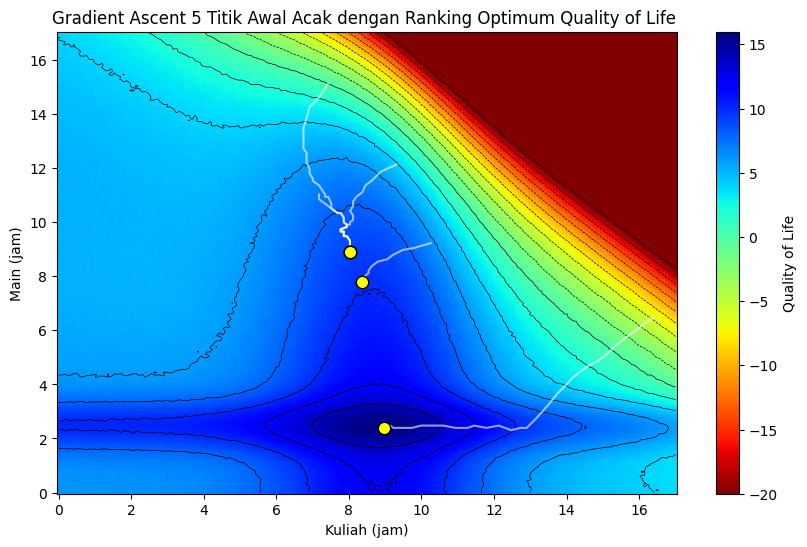

Urutan titik optimum dari yang terbaik:
1. Titik (8.97, 2.39) dengan QoL 15.77
2. Titik (8.37, 7.77) dengan QoL 9.82
3. Titik (8.03, 8.88) dengan QoL 9.14
4. Titik (8.03, 8.88) dengan QoL 9.14
5. Titik (8.03, 8.88) dengan QoL 9.14


In [49]:
import numpy as np
import matplotlib.pyplot as plt

# PARAMETER DASAR
istirahat = 7
res = 200
xmin, xmax, ymin, ymax = 0, 24-istirahat, 0, 24-istirahat
x = np.linspace(xmin, xmax, res)
y = np.linspace(ymin, ymax, res)
X, Y = np.meshgrid(x, y)

# PREFERENSI KULIAH & MAIN
kuliah_pref = np.exp(-((X - 9.0)**2) / (3.0**2))
main_pref   = np.exp(-((Y - 2.5)**2) / (1.0**2))

# FAKTOR BARU
sport_time = 0.5
sport_pref = np.exp(-((sport_time - 0.5)**2) / (0.3**2))
social_time = 2.0
social_pref = np.exp(-((social_time - 2.0)**2) / (0.8**2))
selfstudy_time = 2.5
selfstudy_pref = np.exp(-((selfstudy_time - 2.5)**2) / (0.8**2))

# PENALTI
total_waktu = X + Y + sport_time + social_time + selfstudy_time + istirahat
total_penalty = 0.3 * np.exp(np.maximum(total_waktu-24, 0)/3.0)
kebanyakan_main = 1 / (1 + np.exp(-(Y-5)))
kebanyakan_lembur = 1 / (1 + np.exp(-(X-10)))

# RIPPLE + NOISE
np.random.seed(42)
ripple = 0.2 * np.sin(0.3*X) * np.cos(0.4*Y)
ripple += np.random.normal(0, 0.05, size=X.shape)

# OBJECTIVE FUNCTION
Z = (0.6 * kuliah_pref + 0.4 * main_pref) * 10
Z += 2.5 * sport_pref + 2.0 * social_pref + 2.0 * selfstudy_pref
Z -= (kebanyakan_main + kebanyakan_lembur + total_penalty)
Z += ripple
Z_clip = np.clip(Z, -20, 20)

# GRADIENT ASCENT
def gradient_ascent(Z, X, Y, start, lr=1.5, steps=8000):
    i = np.argmin(np.abs(x - start[0]))
    j = np.argmin(np.abs(y - start[1]))
    path = [(x[i], y[j])]
    for _ in range(steps):
        dx = (Z[j, min(i+1,res-1)] - Z[j, max(i-1,0)]) / (2*(x[1]-x[0]))
        dy = (Z[min(j+1,res-1), i] - Z[max(j-1,0), i]) / (2*(y[1]-y[0]))
        i = int(np.clip(i + lr*dx, 0, res-1))
        j = int(np.clip(j + lr*dy, 0, res-1))
        path.append((x[i], y[j]))
    return path

#TITIK AWAL ACAK
np.random.seed(0)
start_points = [(np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax)) for _ in range(5)]
paths = []
optima = []

for sp in start_points:
    p = gradient_ascent(Z_clip, X, Y, start=sp, lr=1.5, steps=8000)
    paths.append(p)
    fx, fy = p[-1]
    i = np.argmin(np.abs(x - fx))
    j = np.argmin(np.abs(y - fy))
    val = Z_clip[j, i]
    optima.append(((fx, fy), val))

#URUTKAN BERDASARKAN NILAI QoL
optima_sorted = sorted(optima, key=lambda t: t[1], reverse=True)

#VISUALISASI
plt.figure(figsize=(10,6))
c = plt.pcolormesh(X, Y, Z_clip, cmap="jet_r", shading="auto")
plt.contour(X, Y, Z_clip, levels=20, colors="black", linewidths=0.5)
plt.colorbar(c, label="Quality of Life")

# plot semua jalur
for idx, p in enumerate(paths):
    px, py = zip(*p)
    plt.plot(px, py, "w-", alpha=0.6)   # jalur gradient ascent
    plt.scatter(px[-1], py[-1], color="yellow", edgecolor="black", s=80, zorder=5)

plt.xlabel("Kuliah (jam)")
plt.ylabel("Main (jam)")
plt.title("Gradient Ascent 5 Titik Awal Acak dengan Ranking Optimum Quality of Life ")
plt.show()

#CETAK URUTAN OPTIMUM
print("Urutan titik optimum dari yang terbaik:")
for rank, ((fx, fy), val) in enumerate(optima_sorted, 1):
    print(f"{rank}. Titik ({fx:.2f}, {fy:.2f}) dengan QoL {val:.2f}")

**Cerita aktivitas harian**

Saya ,Desi Nofitasari mahasiswi Fakultas Ilmu Komputer Program studi Sains Data memiliki waktu 24 jam untuk melakukan semua kegiatan sehari-hari. Keseimbangan kualitas hidup sangat penting karena berpengaruh pada kesehatan mental,kesehatan fisik,produktivitas,serta pengembangan diri jangka panjang. Hal tersebut membuat saya termotivasi untuk memetakkan quality of life saya dalam sebuah grafik pendekatan analisis agar mudah memahami hubungan alokasi waktu dengan beberapa variabel seperti istirahat,main,sosial,olahraga,dan belajar mandiri.

Saya memulai hari dengan bangun pagi pukul 05.00 WIB kemudian saya melakukan ibadah,sarapan pagi,dan berolahraga selama 30 menit. setelah itu, saya siap-siap untuk kuliah yang berlangsung dari jam 07.30-16.00 sekitar 8-9 jam.

Sepulang kuliah,energi saya biasanya cukup terkuras,sehingga saya membutuhkan waktu untuk menyegarkan diri dengan bersih diri,bermain game,nongkrong,dan menekuni hobi seperti membaca novel dan memasak. Untuk kegiatan ini,biasanya saya alokasikan waktu sekitar 2 jam 30 menit. Tidak hanya bermain,saya juga menyisihkan waktu sekitar 2 jam untuk aktivitas sosial penting seperti bertemu support system atau meluangkan waktu khusus untuk berbicara dengan keluarga.

Setelah energi kembali terisi, saya fokus pada kewajiban akademik dengan belajar ulang materi kuliah sekaligus mengerjakan tugas. Waktu yang saya alokasikan untuk ini adalah 2 jam 30 menit. Terakhir, saya menutup hari dengan tidur mulai pukul 22.00 hingga 05.00, sehingga mendapatkan waktu istirahat sekitar 7 jam.

Jika pola alokasi waktu ini dipetakan ke dalam grafik Quality of Life di atas, maka titik keseimbangan yang saya jalani berada pada koordinat sekitar kuliah 8-9 jam, waktu bermain 2-3 jam, olahraga 0,5 jam, aktivitas sosial 2 jam, self-study 2,5 jam serta istirahat 7 jam. Titik ini selaras dengan salah satu area optimum lokal pada grafik, meskipun bukan yang paling tinggi dibandingkan dengan titik optimum global.

Pola titik optimum pada gambar diperoleh melalui iterasi dari titik awal acak menggunakan metode gradient ascent, sehingga muncul beberapa titik yang mendekati kondisi optimum. Dari hasil tersebut terlihat bahwa semakin tinggi alokasi waktu untuk kuliah atau bermain justru dapat menurunkan quality of life. Sebaliknya, faktor olahraga, aktivitas sosial, istirahat, self-study,dan mood harian memiliki pengaruh besar dalam menjaga keseimbangan, terutama karena keduanya saling berkaitan dengan alokasi waktu kuliah dan bermain.Oleh karena itu, pengaturan waktu yang baik, seimbang, dan konsisten menjadi kunci untuk memperbaiki serta mempertahankan kualitas hidup secara berkelanjutan.